In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/content/Ad Click Data.csv')

In [3]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [14]:
data.isna().mean()

Daily Time Spent on Site    0.000
Age                         0.000
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.001
Male                        0.003
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [16]:
data['City'].fillna(data['City'].mode()[0], inplace = True)

In [28]:
# let's make a list with the most frequent categories of the variable

top_10_labels = [y for y in data['Ad Topic Line'].value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Cloned 5thgeneration orchestration',
 'Synergistic fresh-thinking array',
 'Programmable asymmetric data-warehouse',
 'Business-focused value-added definition',
 'Organic bottom-line service-desk',
 'Triple-buffered reciprocal time-frame',
 'Robust logistical utilization',
 'Sharable client-driven software',
 'Enhanced dedicated support',
 'Reactive local challenge']

In [29]:
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode

    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [32]:
one_hot_encoding_top_x(data, 'Ad Topic Line', top_10_labels)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Timestamp,Clicked on Ad,City_Lisamouth,City_Williamsport,...,Ad Topic Line_Cloned 5thgeneration orchestration,Ad Topic Line_Synergistic fresh-thinking array,Ad Topic Line_Programmable asymmetric data-warehouse,Ad Topic Line_Business-focused value-added definition,Ad Topic Line_Organic bottom-line service-desk,Ad Topic Line_Triple-buffered reciprocal time-frame,Ad Topic Line_Robust logistical utilization,Ad Topic Line_Sharable client-driven software,Ad Topic Line_Enhanced dedicated support,Ad Topic Line_Reactive local challenge
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0.0,3/27/2016 0:53,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1.0,4/4/2016 1:39,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0.0,3/13/2016 20:35,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1.0,1/10/2016 2:31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0.0,6/3/2016 3:36,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
data.drop(['Ad Topic Line'], axis =1, inplace = True)

In [34]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,City_Lisamouth,City_Williamsport,City_Port Julie,...,Ad Topic Line_Cloned 5thgeneration orchestration,Ad Topic Line_Synergistic fresh-thinking array,Ad Topic Line_Programmable asymmetric data-warehouse,Ad Topic Line_Business-focused value-added definition,Ad Topic Line_Organic bottom-line service-desk,Ad Topic Line_Triple-buffered reciprocal time-frame,Ad Topic Line_Robust logistical utilization,Ad Topic Line_Sharable client-driven software,Ad Topic Line_Enhanced dedicated support,Ad Topic Line_Reactive local challenge
0,68.950000,35,61833.90,256.09,0.0,3/27/2016 0:53,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,80.230000,31,68441.85,193.77,1.0,4/4/2016 1:39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.470000,26,59785.94,236.50,0.0,3/13/2016 20:35,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,74.150000,29,54806.18,245.89,1.0,1/10/2016 2:31,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,68.370000,35,73889.99,225.58,0.0,6/3/2016 3:36,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,1.0,2/11/2016 21:49,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.300000,45,67782.17,134.42,1.0,4/22/2016 2:07,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,64.929524,51,42415.72,120.37,1.0,2/1/2016 17:24,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.550000,19,41920.79,187.95,0.0,3/24/2016 2:35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data.drop(['Timestamp'], axis =1 , inplace = True)

In [39]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,City_Lisamouth,City_Williamsport,City_Port Julie,City_Pamelamouth,...,Ad Topic Line_Cloned 5thgeneration orchestration,Ad Topic Line_Synergistic fresh-thinking array,Ad Topic Line_Programmable asymmetric data-warehouse,Ad Topic Line_Business-focused value-added definition,Ad Topic Line_Organic bottom-line service-desk,Ad Topic Line_Triple-buffered reciprocal time-frame,Ad Topic Line_Robust logistical utilization,Ad Topic Line_Sharable client-driven software,Ad Topic Line_Enhanced dedicated support,Ad Topic Line_Reactive local challenge
0,68.950000,35,61833.90,256.09,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,80.230000,31,68441.85,193.77,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.470000,26,59785.94,236.50,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,74.150000,29,54806.18,245.89,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,68.370000,35,73889.99,225.58,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.300000,45,67782.17,134.42,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,64.929524,51,42415.72,120.37,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.550000,19,41920.79,187.95,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X = data.drop('Clicked on Ad', axis =1)
y = data['Clicked on Ad']

rfc = RandomForestClassifier(random_state=1)
rfecv = RFECV(estimator=rfc, step =1, cv =10, scoring = 'accuracy')

rfecv.fit(X, y)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=1),
      scoring='accuracy')

In [41]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))


Optimal Number of features is : 6


In [42]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


In [43]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_Australia
0,68.950000,35,61833.90,256.09,0.0,0
1,80.230000,31,68441.85,193.77,1.0,0
2,69.470000,26,59785.94,236.50,0.0,0
3,74.150000,29,54806.18,245.89,1.0,0
4,68.370000,35,73889.99,225.58,0.0,0
...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,1.0,0
996,51.300000,45,67782.17,134.42,1.0,0
997,64.929524,51,42415.72,120.37,1.0,0
998,55.550000,19,41920.79,187.95,0.0,0


In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [45]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

0

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)


In [49]:
y.value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [50]:
num_features = x_train.select_dtypes(exclude = "object")
cat_features = x_train.select_dtypes(include = "object")

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier



step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(),num_features.columns )
    ],
    remainder='passthrough'
)

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Embedding, SimpleRNN, Dropout


# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Preprocess 'previous_year_rating' column


    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),

}
# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

100%|██████████| 15/15 [00:01<00:00,  9.09it/s]

+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |      0.975 |    0.975244 | 0.974137 |   0.974665 | [[109   2]         |
|                                 |            |             |          |            |  [  3  86]]        |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |      0.965 |    0.965097 | 0.964015 |   0.964531 | [[108   3]         |
|                                 |            |             |          |            |  [  4  85]]        |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi

+---------------------+-------+----------+----------+----------+-------------+-------------+------------------------------------+------------------------------------+
|                     |       |          |          |    Model | Accuracy    |   Precision | Recall                             | F1 Score                           |
+=====================+=======+==========+==========+==========+=============+=============+====================================+====================================+
| Logistic Regression | 0.975 | 0.975244 | 0.974137 | 0.974665 | [[109   2]  |    0.974137 | [0.445      0.97727273 1.        ] | [1.         0.96629213 0.        ] |
|                     |       |          |          |          |  [  3  86]] |             |                                    |                                    |
+---------------------+-------+----------+----------+----------+-------------+-------------+------------------------------------+------------------------------------

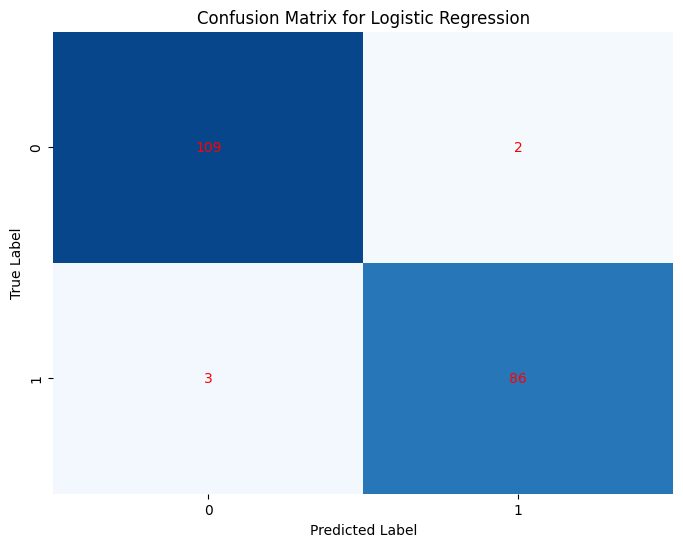

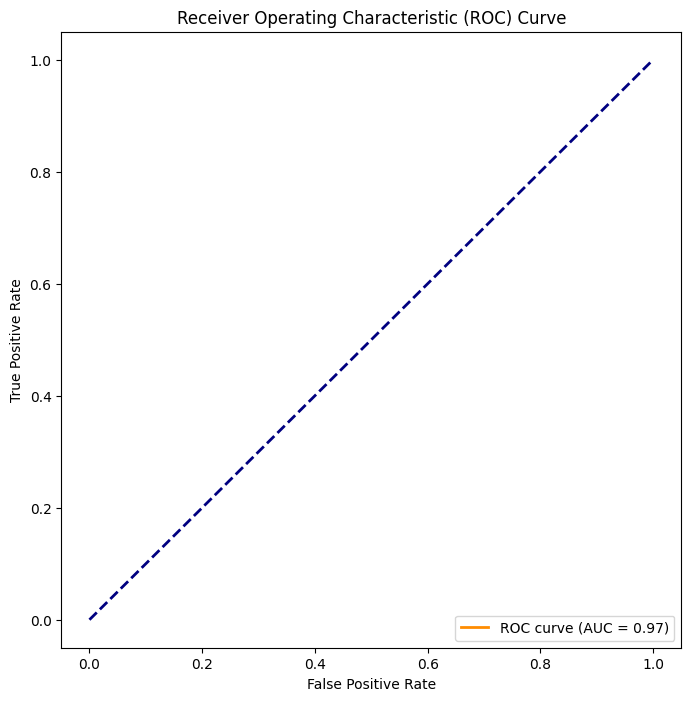

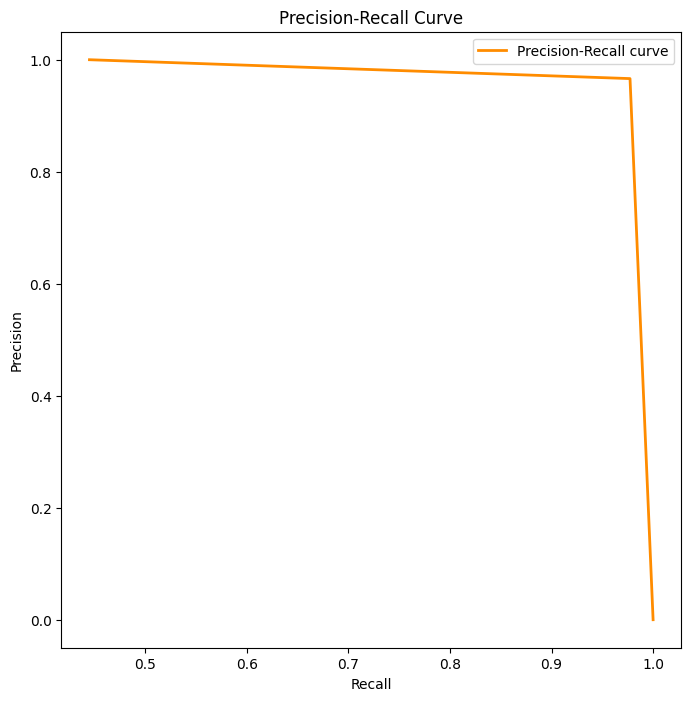

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your class labels (replace with your actual class labels)
class_labels = [0, 1]

# Define your step1 transformer (replace with your actual transformer)

def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Convert string labels to binary labels
    label_mapping = {label: idx for idx, label in enumerate(class_labels)}
    y_test_binary = np.array([label_mapping[label] for label in y_test])
    y_pred_binary = np.array([label_mapping[label] for label in y_pred])

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary, average="macro")
    recall = recall_score(y_test_binary, y_pred_binary, average="macro")
    f1 = f1_score(y_test_binary, y_pred_binary, average="macro")

    # Calculate the confusion matrix with class labels
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_pred_binary)

    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve

# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm, roc_auc, precision_curve, recall_curve])


# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Plot confusion matrix with class labels and show labels
plt.figure(figsize=(8, 6))

# Show diagonal elements in red color
sns.heatmap(results[max_accuracy_index][5], annot=True, fmt="d", cmap="Blues", cbar=False, vmin=0, vmax=results[max_accuracy_index][5].diagonal().max() + 10, annot_kws={"color": "red"})

plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][4], results[max_accuracy_index][3], color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(results[max_accuracy_index][6]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][7], results[max_accuracy_index][8], color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [55]:
print(set(y_test))


{0, 1}


In [61]:
model = LogisticRegression()
model.fit(x_train, y_train)  # Training the model

# Calculate metrics on the training set
train_accuracy = accuracy_score(y_train, model.predict(x_train))
train_precision = precision_score(y_train, model.predict(x_train), average='macro')
train_recall = recall_score(y_train, model.predict(x_train), average='macro')
train_f1 = f1_score(y_train, model.predict(x_train), average='macro')

# Calculate metrics on the test set
test_accuracy = accuracy_score(y_test, model.predict(x_test))
test_precision = precision_score(y_test, model.predict(x_test), average='macro')
test_recall = recall_score(y_test, model.predict(x_test), average='macro')
test_f1 = f1_score(y_test, model.predict(x_test), average='macro')

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

metrics_df

,Metric,Train Set,Test Set
0,Accuracy,0.905000,0.910000
1,Precision,0.905876,0.908150
2,Recall,0.905754,0.911125
3,F1 Score,0.904999,0.909265


In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [64]:
model = LogisticRegression()

# Define StratifiedKFold
kf3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

i = 1
for train_index, test_index in kf3.split(X, y):
    X_train = X.iloc[train_index]

    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)  # Training the model
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Accuracy for fold {i} on the test set: {accuracy:.3f}")
    i += 1

print(f"Mean Accuracy: {accuracy.mean():.3f}")

Accuracy for fold 1 on the test set: 0.935
Accuracy for fold 2 on the test set: 0.910
Accuracy for fold 3 on the test set: 0.930
Accuracy for fold 4 on the test set: 0.875
Accuracy for fold 5 on the test set: 0.955
Mean Accuracy: 0.955
